In [9]:
import matplotlib.pyplot as plt
import torch
import dataset
import random
# Instantiate the dataset (adjust the data_path as needed)
data = dataset.PhysioNetDataset(split="train", data_path="../data/physionet_compressed.npz")
data_test = dataset.PhysioNetDataset(split="test", data_path="../data/physionet_compressed.npz")

Index =  250
[]
Index =  2508
[0.02133333 0.06366666 0.10866667 0.16066666 0.19199999 0.28833333
 0.362      0.442      0.46300003 0.52533334 0.60866666 0.69600004
 0.7963333  0.85866666 0.942      0.98366666]


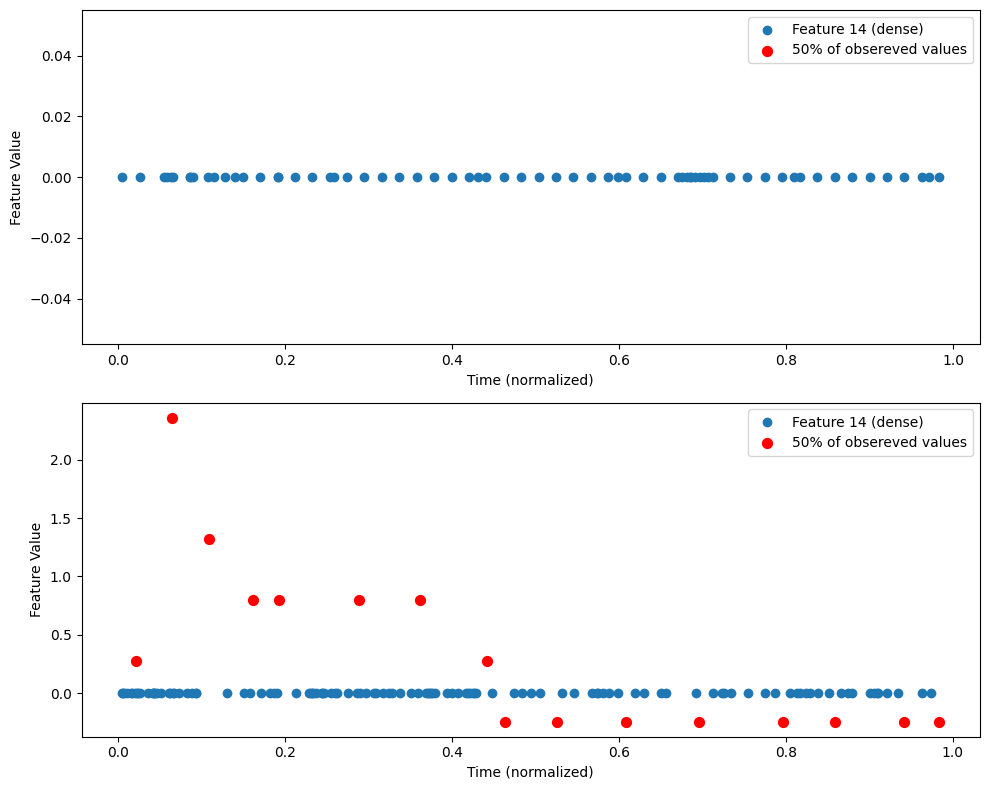

In [63]:

# Number of samples to plot
num_samples = 2

# Create subplots
fig, axs = plt.subplots(num_samples, 1, figsize=(10, 4 * num_samples))
if num_samples == 1:
    axs = [axs]  # ensure axs is iterable
index=14

# Randomly select num_samples from the dataset

for i , idx in enumerate([random.randint(1, len(data)) for _ in range(num_samples)]):
    print("Index = ", idx)
    sample = data[idx]
    
    # Extract components from the sample
    # positions: shape (1, T) -> squeeze to (T,)
    non_zero_indices = sample["positions"].squeeze(0).numpy() != 0
    positions = sample["positions"].squeeze(0).numpy() 
    positions = positions[non_zero_indices]
    # values: shape (T, 41)
    values = sample["values"].numpy() 
    values = values[non_zero_indices]                   
    # mask: shape (T, 41) (boolean values)
    mask   = sample["mask"].numpy()
    mask   = mask[non_zero_indices]                        

    # Plot the first feature over time as a line
    axs[i].scatter(positions, values[:, index], label="Feature %d (dense)" %index, marker='o', linestyle='-')
    
    # Overlay observed points (where mask is True) for feature 1 as red dots
    observed_indices = mask[:, index]  # Boolean mask for observed points
    axs[i].scatter(positions[observed_indices], values[observed_indices, index],
                   color="red", label="50% of obsereved values", s=50, zorder=5)
    
    axs[i].set_xlabel("Time (normalized)")
    axs[i].set_ylabel("Feature Value")
    axs[i].legend()
    print(positions[observed_indices])

plt.tight_layout()
plt.show()


In [9]:
data[0]['values'].shape

torch.Size([203, 41])